In [1]:
from src.topic_model import TopicModelPipeline
from src.preprocessor import Preprocessor

In [ ]:
def new_clean_text_columns(self):
    """
    Method to overwrite clean_text_columns method from Preprocessor.
    """
    self.df[self.text_column] = "Example"


Preprocessor.clean_text_columns = new_clean_text_columns

In [2]:
model = TopicModelPipeline(
    project_name="Kaggle_Sentiment_Data",
    output_path=r"D:\Git\topic-modeling-pipeline\data\Output",
    documents_path=r"D:\Git\topic-modeling-pipeline\data\Input",
    file_type="parquet",
    text_column="text",
    time_column="date",
    time_format="%a %b %d %H:%M:%S %Z %Y",
    clean_text=True,
    sample=True,
    sample_frequency="weekly",
    tresh_absolut=200,
    min_cluster_size=10,
    n_neighbors=5,
    vocab_frequency=0,
    top_n_words=50,
)

Folder 'Kaggle_Sentiment_Data_2023-10-03_10-45' created!
Loading, merging and cleaning files.
Taking a subsample of the data...
Cleaning the text column...


Pandas Apply:   0%|          | 0/2400 [00:00<?, ?it/s]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving sampled dataframe with the name: Kaggle_Sentiment_Data_merged_dataframe.parquet.
Tokenizing words and filtering for less used ones.


100%|██████████| 2400/2400 [00:00<00:00, 149999.70it/s]

Generating sentence level embeddings using all-MiniLM-L6-v2.


Batches:   0%|          | 0/75 [00:00<?, ?it/s]

Reducing embedding dimensionality
UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=5, random_state=42, verbose=True)
Tue Oct  3 10:45:27 2023 Construct fuzzy simplicial set
Tue Oct  3 10:45:31 2023 Finding Nearest Neighbors
Tue Oct  3 10:45:34 2023 Finished Nearest Neighbor Search
Tue Oct  3 10:45:37 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Oct  3 10:45:40 2023 Finished embedding
Performing clustering on embeddings


2023-10-03 10:45:40,770 - BERTopic - The dimensionality reduction algorithm did not contain the `y` parameter and therefore the `y` parameter was not used
2023-10-03 10:45:40,771 - BERTopic - Reduced dimensionality
2023-10-03 10:45:40,773 - BERTopic - Clustered reduced embeddings


Fitting the BERTopic model.


c:\Users\steng\anaconda3\envs\topic_model\lib\site-packages\bertopic\vectorizers\_ctfidf.py:69: RuntimeWarning: divide by zero encountered in divide
  idf = np.log((avg_nr_samples / df)+1)


In [3]:
topics = model.topic_model.get_topic_info()

In [4]:
topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1369,-1_happy_hey_aww_morning,"[happy, hey, aww, morning, day, glad, hope, wi...",[[Utterli] http://bit.ly/cREjI Good Morning: W...
1,0,295,0_working_slept_asleep_work,"[working, slept, asleep, work, awake, morning,...",[Why can't i go back to sleep right now? I'm n...
2,1,250,1_twitter_tweet_tweeting_twitters,"[twitter, tweet, tweeting, twitters, tweets, t...",[I need a new profile picture for my twitter. ...
3,2,118,2_sick_sickness_flu_cold,"[sick, sickness, flu, cold, feeling, sore, hea...",[Gurd morning! In F9 Feel ill! Why am I alway...
4,3,109,3_weather_raining_rainy_rain,"[weather, raining, rainy, rain, rained, summer...",[ Have you been doing rain dances for RI? I AM...
5,4,69,4_miss_missed_misses_gone,"[miss, missed, misses, gone, lt, back, sad, so...","[I Miss You!, I miss you, I miss my ]"
6,5,56,5_mothers_mother_mom_moms,"[mothers, mother, mom, moms, mommy, day, mommi...","[happy mothers' day to my , HAPPY MOTHER'S DAY..."
7,6,52,6_pizza_recipe_food_cooking,"[pizza, recipe, food, cooking, hungry, dinner,...",[doesn't know what he's gonna have for lunch ...
8,7,37,7_concert_tour_festival_mtv,"[concert, tour, festival, mtv, awards, festiva...","[ wooo! i cant wait for the concert! x, you ..."
9,8,21,8_sorry_forgive_babe_tough,"[sorry, forgive, babe, tough, didnt, buddy, aw...",[ Lost your DM. Sorry took so long to get b...


Reducing embedding dimensionality to 2D
UMAP(angular_rp_forest=True, metric='cosine', n_neighbors=5, random_state=42, verbose=True)
Tue Oct  3 10:45:41 2023 Construct fuzzy simplicial set
Tue Oct  3 10:45:45 2023 Finding Nearest Neighbors
Tue Oct  3 10:45:45 2023 Finished Nearest Neighbor Search
Tue Oct  3 10:45:45 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Oct  3 10:45:48 2023 Finished embedding


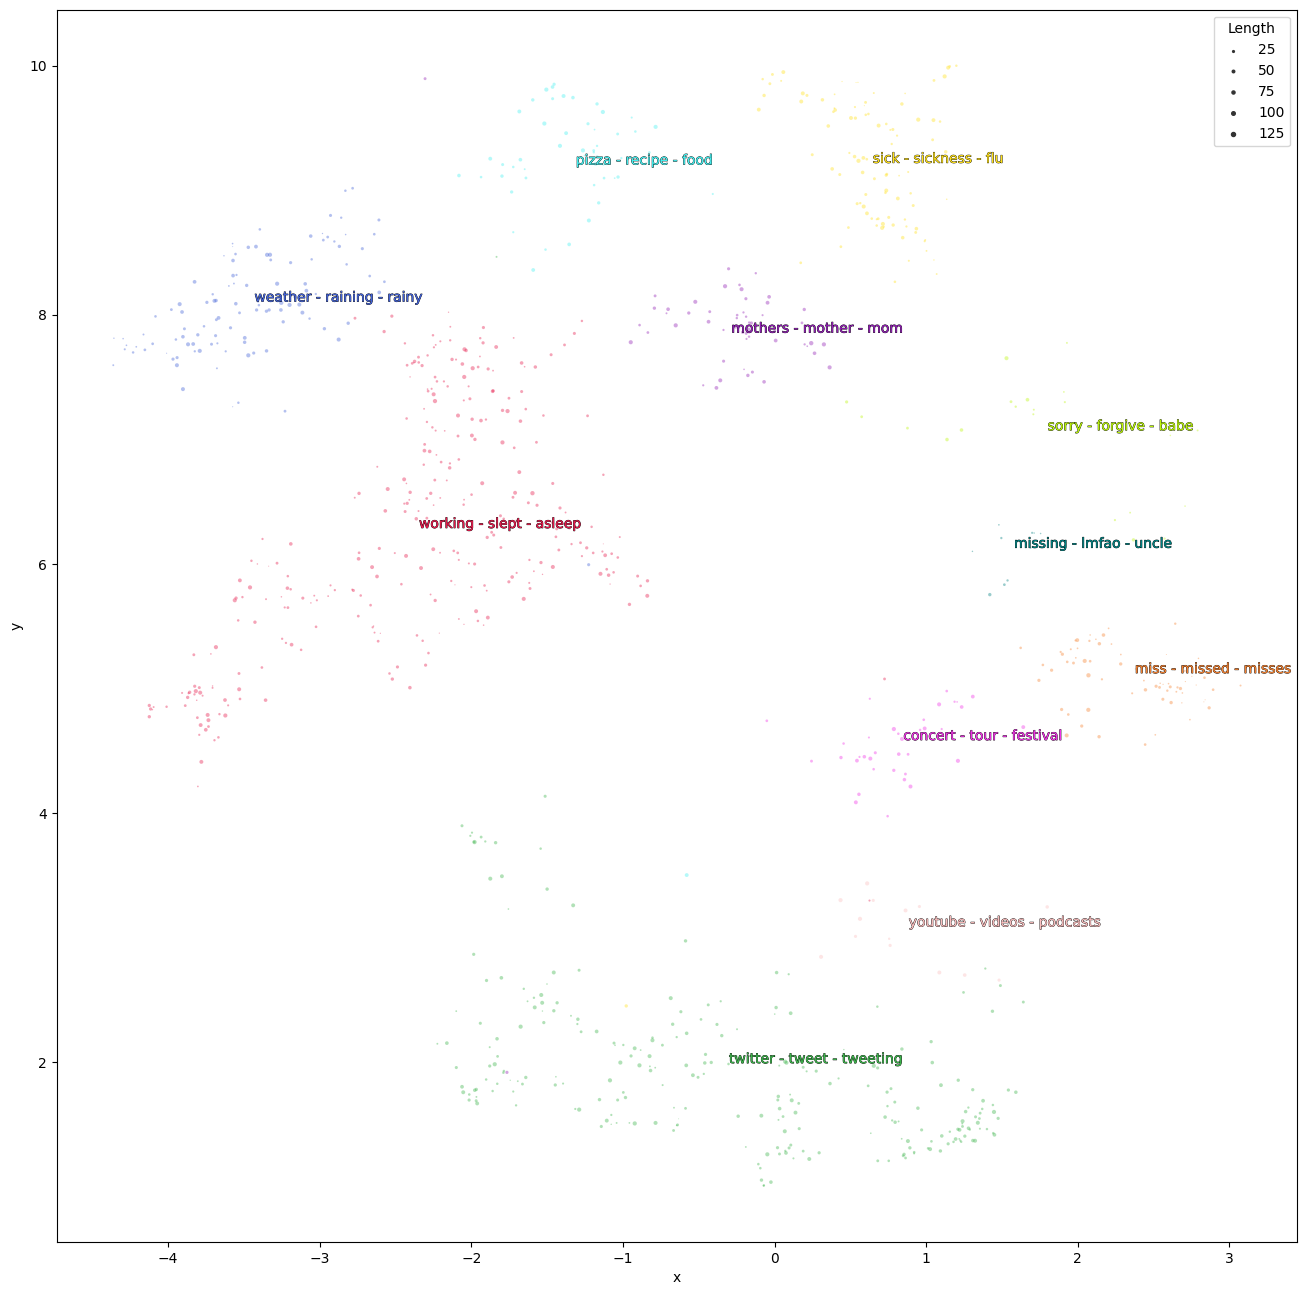

In [5]:
model.plot_clusters()

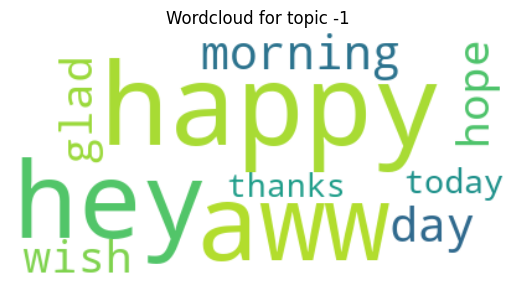

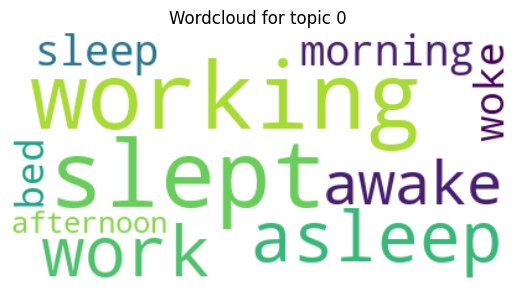

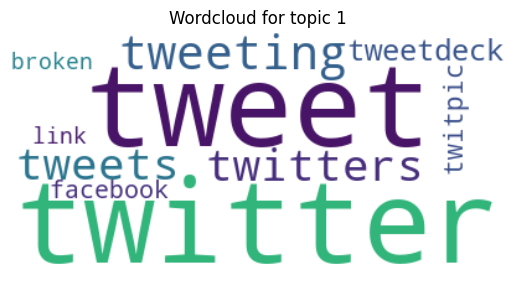

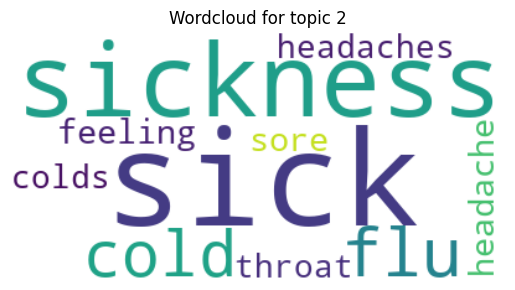

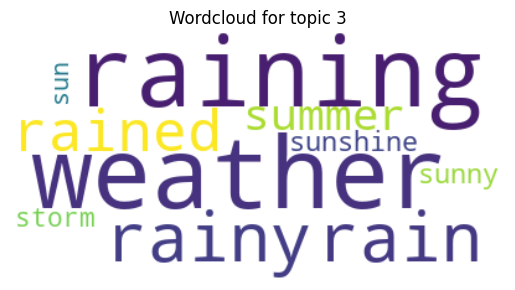

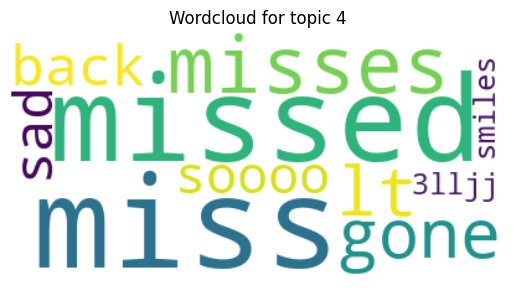

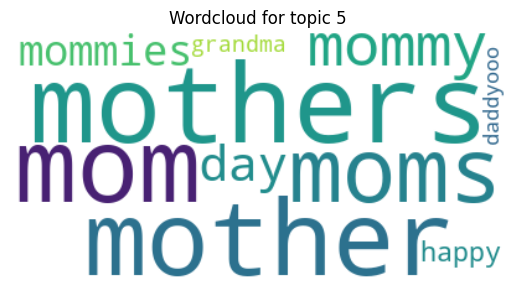

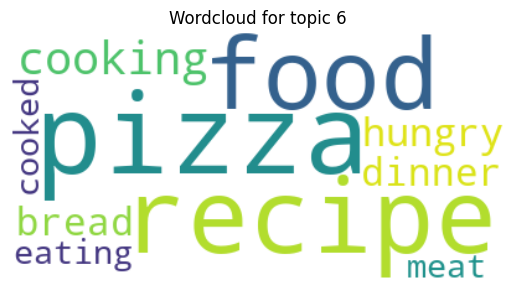

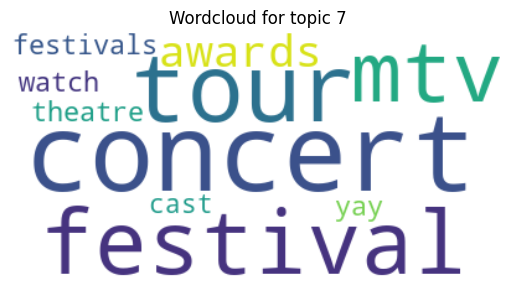

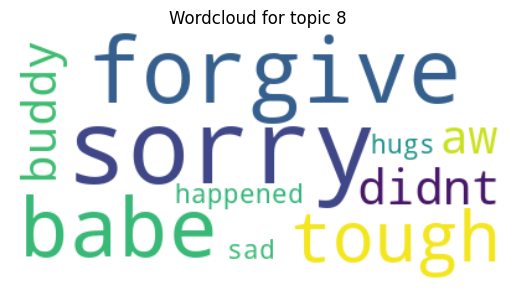

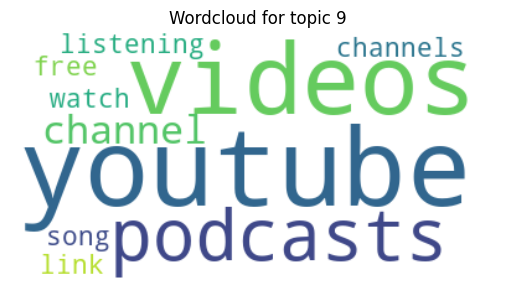

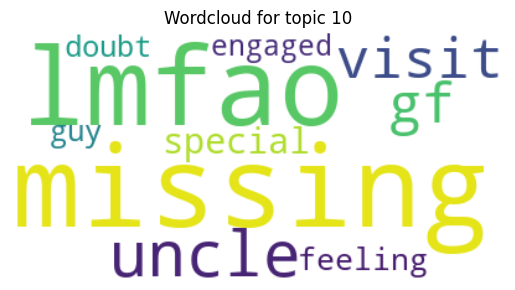

In [6]:
model.plot_wordclouds()